In [1]:
import numpy as np
from IPython import display
import torch

from d2l import torch as d2l

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [3]:
f(2), f(3), f(5)

(4, 15, 55)

In [4]:
def numerical_lim(f, x, h):
    return (f(x+h) - f(x))/h

In [5]:
# looking at value of limits 

h = 0.00001
for i in range(5):
    print(f"for h {h:.5f}. The value numerical limit is {numerical_lim(f, 3, h):.5f}")
    h = h * 10

for h 0.00001. The value numerical limit is 14.00003
for h 0.00010. The value numerical limit is 14.00030
for h 0.00100. The value numerical limit is 14.00300
for h 0.01000. The value numerical limit is 14.03000
for h 0.10000. The value numerical limit is 14.30000


Now we can apply a few of the above rules to find 
u′ = f′(x) = 3 ddx x2 − 4ddx x = 6x − 4. 
Thus, by setting x = 1, we have u′ = 2: this is supported by our earlier experiment in this section where
the numerical result approaches 2. This derivative is also the slope of the tangent line to the curve
u = f(x) when x = 1

In [6]:
# use svg function will display sharper images in matplotlib

def use_svg_display(): #@save
    """Using svg display to dispaly a plot in jupyter"""
    display.set_matplotlib_formats('svg')


In [7]:
def set_figsize(figsize=(3.5,2.5)): #@save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
    

In [13]:
def set_axes(axes, xlabel, ylabel,xlim, ylim, xscale, yscale, legend): #@save
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    
    if xlim:
        axes.set_xlim(xlim)
    if ylim:
        axes.set_ylim(ylim)
    
    if xscale:
        axes.set_xscale(xscale)
    if yscale:
        axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()

In [14]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', 
         fmts =('-', 'm--', 'g- ', 'r:'), figsize=(3.5,2.5), axes=None): #@save
    
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    
    axes = axes if axes else d2l.plt.gca()
    
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim==1 or isinstance(X, list) and not hasattr(X[0],"__len__" ) )
    
    if has_one_axis(X):
        X = [X]
    
    if Y is None:
        X, Y = [[]]* len(X), X
    
    elif has_one_axis(Y):
        Y = [Y]
    
    if len(X) != len(Y):
        X = X * len(Y)
    
    axes.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel,ylabel, xlim, ylim, xscale, yscale, legend)

In [15]:
x =  np.arange(0,3, 0.3)

<ipython-input-6-14172599cac0>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


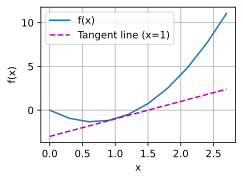

In [16]:
plot(X=x, Y=[f(x), 2 * x - 3], xlabel='x', ylabel='f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### Exercises
1. Plot the function y = f(x) = x
3 −1x
and its tangent line when x = 1.

In [17]:
def cubic_f(x):
    return x ** 3 - (1/x)

# tangent would be  3 * (x ** 2) - (1/ (x ** 2)) 

In [19]:
x = np.arange(0, 5, 0.3)

<ipython-input-17-93df4fe01931>:2: RuntimeWarning: divide by zero encountered in true_divide
  return x ** 3 - (1/x)
<ipython-input-20-0c758fa01c53>:1: RuntimeWarning: divide by zero encountered in true_divide
  plot(X=x,Y=[cubic_f(x), 3 * (x ** 2) - (1/ (x ** 2))], xlabel='x', ylabel='y', legend=['f(x)', 'tangent line (x=1)'])
<ipython-input-6-14172599cac0>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


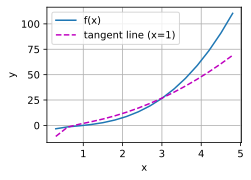

In [20]:
plot(X=x,Y=[cubic_f(x), 3 * (x ** 2) - (1/ (x ** 2))], xlabel='x', ylabel='y', legend=['f(x)', 'tangent line (x=1)'])

<ipython-input-29-24928b691d6f>:3: RuntimeWarning: divide by zero encountered in true_divide
  plot(x, [x ** 3 - 1 / x, 4 * x - 4], 'x', 'f(x)', legend=['f(x) = x ** 3 - 1 / x ', 'Tangent line (x=1) : y = 4 * x - 4 '])
<ipython-input-6-14172599cac0>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


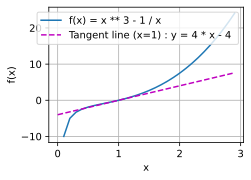

In [29]:
# actual
x = np.arange(0, 3, 0.1)
plot(x, [x ** 3 - 1 / x, 4 * x - 4], 'x', 'f(x)', legend=['f(x) = x ** 3 - 1 / x ', 'Tangent line (x=1) : y = 4 * x - 4 '])

2. Find the gradient of the function f(x) = 3x
21 + 5ex2.

In [24]:
import math
def grad_1(x1, x2):
    return 3 * 2 * (x1) + 5 * math.exp(x2), 3 * (x1** 2) + 5 * math.exp( x2)

In [25]:
grad_1(1, 2)

(42.945280494653254, 39.945280494653254)

3. What is the gradient of the function f(x) = ∥x∥2?


In [26]:
def grad_2(x_array):
    return 1/2 * x_array.sum() ** 2 * 2 * x_array.sum()

In [28]:
grad_2(np.array([2,3]))

125.0

4. Can you write out the chain rule for the case where u = f(x, y, z) and x = x(a, b), y = y(a, b),
and z = z(a, b)?

In [ ]:
# not aware

# Is this meant to be simplified to df/dx * (dx/da + dx/db) and so on for y, and z?